In [15]:
import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl

In [16]:
parking_df = pd.read_csv("data/parking_violations_2015.csv")
parking_df.head()

,anon_ticket_number,issue_datetime,anon_plate_id,violation_desc,fine,issuing_agency,lat,lon
0,4674379,01/01/2015 00:00,934383,BLOCKNG MASS TRANSIT,101,SEPTA,39.975789,-75.163471
1,4707189,01/01/2015 00:00,1065037,BLOCKNG MASS TRANSIT,101,SEPTA,39.975789,-75.163471
2,4584526,01/01/2015 00:01,1262953,SIDEWALK CC,76,POLICE,39.954927,-75.140262
3,4669046,01/01/2015 00:01,47082,SIDEWALK CC,76,POLICE,39.954927,-75.140262
4,4588341,01/01/2015 00:02,1509569,SIDEWALK CC,76,POLICE,39.954927,-75.140262


In [17]:
parking_df.shape

(119910, 8)

In [18]:
parking_df.dropna(subset=['lat', 'lon'], how='all', inplace=True)

In [19]:
parking_df.shape

(107710, 8)

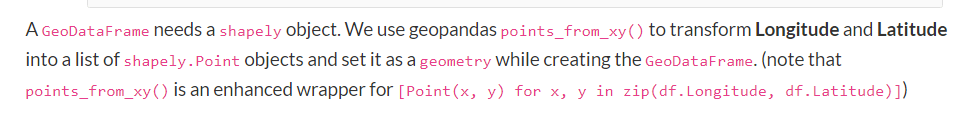

In [25]:
from shapely.geometry import Point
gdf = gpd.GeoDataFrame(parking_df, geometry = [Point(x,y) for x,y in zip(parking_df['lon'], parking_df['lat'])], crs = 'EPSG:4326')
gdf.head()

,anon_ticket_number,issue_datetime,anon_plate_id,violation_desc,fine,issuing_agency,lat,lon,geometry
0,4674379,01/01/2015 00:00,934383,BLOCKNG MASS TRANSIT,101,SEPTA,39.975789,-75.163471,POINT (-75.16347 39.97579)
1,4707189,01/01/2015 00:00,1065037,BLOCKNG MASS TRANSIT,101,SEPTA,39.975789,-75.163471,POINT (-75.16347 39.97579)
2,4584526,01/01/2015 00:01,1262953,SIDEWALK CC,76,POLICE,39.954927,-75.140262,POINT (-75.14026 39.95493)
3,4669046,01/01/2015 00:01,47082,SIDEWALK CC,76,POLICE,39.954927,-75.140262,POINT (-75.14026 39.95493)
4,4588341,01/01/2015 00:02,1509569,SIDEWALK CC,76,POLICE,39.954927,-75.140262,POINT (-75.14026 39.95493)


In [12]:
#gdf = gpd.GeoDataFrame(parking_df, geometry=gpd.points_from_xy(parking_df.lon, parking_df.lat), crs="EPSG:4326")
#gdf.head()

,anon_ticket_number,issue_datetime,anon_plate_id,violation_desc,fine,issuing_agency,lat,lon,geometry
0,4674379,01/01/2015 00:00,934383,BLOCKNG MASS TRANSIT,101,SEPTA,39.975789,-75.163471,POINT (-75.16347 39.97579)
1,4707189,01/01/2015 00:00,1065037,BLOCKNG MASS TRANSIT,101,SEPTA,39.975789,-75.163471,POINT (-75.16347 39.97579)
2,4584526,01/01/2015 00:01,1262953,SIDEWALK CC,76,POLICE,39.954927,-75.140262,POINT (-75.14026 39.95493)
3,4669046,01/01/2015 00:01,47082,SIDEWALK CC,76,POLICE,39.954927,-75.140262,POINT (-75.14026 39.95493)
4,4588341,01/01/2015 00:02,1509569,SIDEWALK CC,76,POLICE,39.954927,-75.140262,POINT (-75.14026 39.95493)


In [26]:
gdf.to_file("data/parking_2015.geojson",  driver='GeoJSON')

In [27]:
m = KeplerGl(height=900)
m.add_data(data=gdf, name='parking_points')
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'parking_points': {'index': [0, 1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 17, 20, 21, 22, 23, 24…